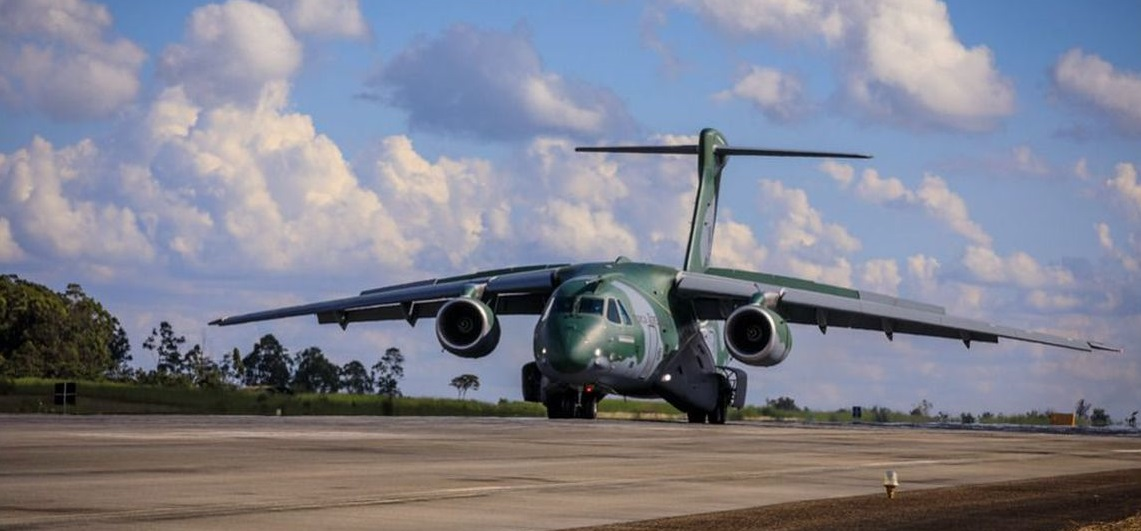

In [16]:
# Avião KC-390 Millennium, da Força Aérea Brasileira (FAB).

# Title

In [1]:
# Curso - DIO - Cognizant Cloud Data Engineer
# Fundamentos de ETL com Python

# Head

In [3]:
# Análise de dados utitlizando base da FAB
# CENIPA - Ocorrências Aeronáuticas na Aviação Civil Brasileira 
# https://www2.fab.mil.br/cenipa/index.php/ultimas-noticias/1157-cenipa-dados-abertos-sao-atualizados-em-setembro
# by geanclm in 05/03/2022 at 14:52h

# Local files

In [15]:
!dir

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 2656-7D0D

 Pasta de C:\Users\geanc\Downloads\DATA SCIENCE\DIO - Cognizant Cloud Data Engineer\Python\Fundamentos de ETL com Python

10/03/2022  17:09    <DIR>          .
10/03/2022  17:09    <DIR>          ..
10/03/2022  15:35    <DIR>          .ipynb_checkpoints
10/03/2022  17:09            13.321 FAB_projeto_ETL.ipynb
10/03/2022  15:35           219.263 fundamentos.ipynb
05/03/2022  15:43    <DIR>          img
05/03/2022  15:39           226.120 modelo_dados.png
05/03/2022  15:47           788.905 ocorrencia.csv
               4 arquivo(s)      1.247.609 bytes
               4 pasta(s)   623.912.419.328 bytes dispon¡veis


# Import libs

In [8]:
import pandas as pd
import pandera as pa

# Dataset

In [9]:
# fonte: https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira
df = pd.read_csv('ocorrencia.csv', sep=';',
                 parse_dates=['ocorrencia_dia'], dayfirst=True,
                 encoding='utf-8', usecols=[0,2,5,8,9,11,12,13,19])

In [41]:
df.columns

Index(['codigo_ocorrencia', 'codigo_ocorrencia2', 'ocorrencia_classificacao',
       'ocorrencia_cidade', 'ocorrencia_uf', 'ocorrencia_aerodromo',
       'ocorrencia_dia', 'ocorrencia_hora', 'total_recomendacoes'],
      dtype='object')

# Data validation

In [94]:
# 1 - verificar formato correto do atributo date

# 2 - importante pesquisar sobre expressão regular
# https://blog.dp6.com.br/express%C3%B5es-regulares-a-z-como-elas-podem-melhorar-a-sua-vida-a2700cef6f15

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   codigo_ocorrencia         5167 non-null   int64         
 1   codigo_ocorrencia2        5167 non-null   int64         
 2   ocorrencia_classificacao  5167 non-null   object        
 3   ocorrencia_cidade         5167 non-null   object        
 4   ocorrencia_uf             5167 non-null   object        
 5   ocorrencia_aerodromo      5167 non-null   object        
 6   ocorrencia_dia            5167 non-null   datetime64[ns]
 7   ocorrencia_hora           5166 non-null   object        
 8   total_recomendacoes       5167 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 363.4+ KB


In [68]:
# df['ocorrencia_dia'] = pd.to_datetime(df['ocorrencia_dia'], format ='%d/%m/%Y')
# df['ocorrencia_hora'] = pd.to_datetime(df['ocorrencia_hora'], format ='%H:%M:%S')
# df['ocorrencia_hora'] = df['ocorrencia_hora'].dt.strftime('%H:%M:%S')

In [4]:
df.head()

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,52242,52242,INCIDENTE,PORTO ALEGRE,RS,SBPA,2012-01-05,20:27:00,0
1,45331,45331,ACIDENTE,GUARULHOS,SP,SBGR,2012-01-06,13:44:00,3
2,45333,45333,ACIDENTE,VIAMÃO,RS,****,2012-01-06,13:00:00,0
3,45401,45401,ACIDENTE,SÃO SEBASTIÃO,SP,****,2012-01-06,17:00:00,0
4,45407,45407,ACIDENTE,SÃO SEPÉ,RS,****,2012-01-06,16:30:00,0


In [69]:
# validação do tipo de dados de cada coluna
schema = pa.DataFrameSchema(
    columns = {
        'codigo_ocorrencia':pa.Column(pa.Int, required=True),
        'ocorrencia_uf':pa.Column(pa.String, pa.Check.str_length(2,3)),
        'ocorrencia_hora':pa.Column(pa.String, pa.Check.str_matches(r'^([0-1]?[0-9]|[2][0-3]):([0-5][0-9])(:[0-5][0-9])?$'), nullable=True)
        }
)

In [70]:
schema.validate(df)

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,52242,52242,INCIDENTE,PORTO ALEGRE,RS,SBPA,2012-01-05,20:27:00,0
1,45331,45331,ACIDENTE,GUARULHOS,SP,SBGR,2012-01-06,13:44:00,3
2,45333,45333,ACIDENTE,VIAMÃO,RS,****,2012-01-06,13:00:00,0
3,45401,45401,ACIDENTE,SÃO SEBASTIÃO,SP,****,2012-01-06,17:00:00,0
4,45407,45407,ACIDENTE,SÃO SEPÉ,RS,****,2012-01-06,16:30:00,0
...,...,...,...,...,...,...,...,...,...
5162,80458,80458,ACIDENTE,JATAÍ,GO,####,2021-12-30,20:30:00,0
5163,80452,80452,ACIDENTE,MARACAÍ,SP,*****,2021-12-31,09:30:00,0
5164,80457,80457,INCIDENTE GRAVE,NOVO HAMBURGO,RS,SSNH,2021-12-31,11:59:00,0
5165,80460,80460,INCIDENTE,CURITIBA,PR,SBBI,2021-12-31,15:12:00,0


In [71]:
df[df['ocorrencia_uf']=='***']

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
1099,49474,49474,ACIDENTE,ÁGUAS INTERNACIONAIS,***,****,2013-09-02,02:54:00,0
4728,79956,79956,ACIDENTE,NÃO IDENTIFICADA,***,*****,2021-02-26,11:00:00,0


In [67]:
df[df.index==4728]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
4728,79956,79956,ACIDENTE,NÃO IDENTIFICADA,***,*****,2021-02-26,11:00:00,0


In [91]:
# df[df.ocorrencia_dia.dt.year==2021]
# df[df.ocorrencia_dia.dt.month==2]

In [92]:
df.tail()

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
5162,80458,80458,ACIDENTE,JATAÍ,GO,####,2021-12-30,20:30:00,0
5163,80452,80452,ACIDENTE,MARACAÍ,SP,*****,2021-12-31,09:30:00,0
5164,80457,80457,INCIDENTE GRAVE,NOVO HAMBURGO,RS,SSNH,2021-12-31,11:59:00,0
5165,80460,80460,INCIDENTE,CURITIBA,PR,SBBI,2021-12-31,15:12:00,0
5166,80467,80467,INCIDENTE,PETROLINA,PE,SBPL,2021-12-31,20:30:00,0


# Limpeza de dados